**Credit Card fraud detection with AdaBoost and RandomForestClassifier**


The objective of this notebook is to predict as many fraudulent transactions as possible.
This notebook uses sci-kit AdaBoost classifier with RandomForestClassifier as a base estimator to learn and predict fraudulent transactions.
On average, this method is 97% accurate in detected fraudulent or normal transactions. Moreover,
this implementation detected 93% of fraudlent transactions, and 100% of normal transactions.



In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model, datasets
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
main_df=pd.read_csv("creditcard.csv")
main_df.head()
feature_size = len(main_df.columns)
class_index = feature_size -1 


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     85299
        1.0       1.00      0.97      0.98       144

avg / total       1.00      1.00      1.00     85443

[[85299     0]
 [    5   139]]
AUC = 0.9826


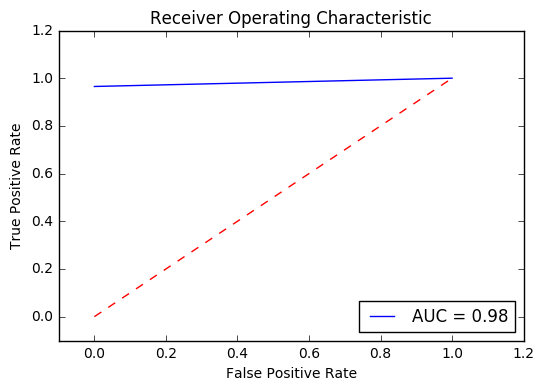

In [15]:
reg_model = AdaBoostClassifier(RandomForestClassifier(),
                            algorithm="SAMME",n_estimators=150)
train_data,test_data = train_test_split(main_df,test_size=0.30)
train_matrix = main_df.as_matrix()
x = train_matrix[:,range(0,class_index-1)]
y=train_matrix[:,class_index]
reg_model = reg_model.fit(x,y)

test_matrix =test_data.as_matrix()
test_x = test_matrix[:,range(0,class_index-1)]
test_y=test_matrix[:,class_index]

predicted = reg_model.predict(test_x)

print(metrics.classification_report(test_y, predicted))
print(metrics.confusion_matrix(test_y, predicted))
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC = %0.4f'% roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Acknowledgement**


I would like to acknowldge kanishkapsingh notebook, which gave me some insights on how to
approach this problem:
https://www.kaggle.com/kanishkapsingh2/d/dalpozz/creditcardfraud/naive-bayes-80-actual-fraud-detection

This introduction to ROC curves also helped my understand how to interpret and test my results
https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/